In [1]:
import assessmentModule as amod
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.signal as ss
%matplotlib inline
"""
Script for reading Matlab sweep and process files,
parsing data, and generating plots for scoring.

"""

__author__ = 'Todd Minehardt'


# Define working directory where Matlab files are and output directory.
data_dir = '/Users/todd/data/WARMUP/RUN'
out_dir = '/Users/todd/data/WARMUP/RUN/plots'

# Get list of LT assessment IDs from list.
#aid_file = '/Users/todd/code/AnalysisTools/config/assessments_run_20160209.txt'
#with open(aid_file, 'r') as fn:
#    aid_list = []
#    for line in fn:
#        aid_list.append(line)
#aid_list = [i.strip('\n') for i in aid_list]

# List process files and sweep files. Only consider assessments
# for which both types of files exist.
os.chdir(data_dir)
process_files = glob.glob('*_process.mat')
process_files = [i.split('_', 1)[0] for i in process_files]
sweep_files = glob.glob('*_sweep.mat')
sweep_files = [i.split('_', 1)[0] for i in sweep_files]

assessment_ids = list(set(sweep_files).intersection(process_files))
    
# Build a dict keyed on assessment ID, containing all information
# from relevant Matlab files. This returns a dict of dicts.
data = {}
for assess_id in assessment_ids:
    data[assess_id] = amod.getMatlabData(assess_id + '_process.mat')
    data[assess_id].update(amod.getMatlabData(assess_id + '_sweep.mat'))

# Plot parameters.
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['legend.loc'] = 'best'

In [ ]:
# Plot remaining assessments.
for assess_id in data.keys():  
    if 'HR' in data[assess_id]['process'].keys():
        HR = data[assess_id]['process']['HR']
    elif 'HR' in data[assess_id]['sweep'].keys():
        HR = data[assess_id]['sweep']['HR']
    
    if 'SmO2' in data[assess_id]['process'].keys():
        SmO2 = data[assess_id]['process']['SmO2']
    elif 'SmO2' in data[assess_id]['sweep'].keys():
        SmO2 = data[assess_id]['sweep']['SmO2']
        
    if 'tHb' in data[assess_id]['process'].keys():     
        tHb = data[assess_id]['process']['tHb']

    
    tissueTF = data[assess_id]['process']['tissueTF']
    ambient = data[assess_id]['sweep']['ambient']
    OD15 = data[assess_id]['process']['OD15']
    OD27 = data[assess_id]['process']['OD27']
    
    fig, ax = plt.subplots(2, 3)
    
    x2 = np.arange(0, len(OD15)) / 5
    ax[0, 0].set_ylim(np.nanmin(OD15), np.nanmax(OD15))
    ax[0, 0].plot(x2, OD15)
    ax[0, 0].set_xlabel('OD @ 15 mm')
        
    x2 = np.arange(0, len(ambient)) / 5
    ax[0, 1].plot(x2, ambient,
                  label=str(np.nanmin(ambient)) + ' ' + str(np.nanmax(ambient)))
    ax[0, 1].set_xlabel('ambient light (counts)')
    ax[0, 1].legend()
    
    x2 = np.arange(0, len(SmO2)) / 5
    ax[0, 2].plot(x2, SmO2, color='red')
    ax[0, 2].set_xlabel('SmO2')
    ax[0, 2].set_ylim(np.nanmin(SmO2), np.nanmax(SmO2))
    ax2 = ax[0, 2].twinx()
    ax2.set_ylabel('tissue')
    ax2.set_ylim(-5, 105)
    ax2.plot(x2, tissueTF *100, color='blue')

    x2 = np.arange(0, len(OD27)) / 5
    ax[1, 0].set_ylim(np.nanmin(OD27), np.nanmax(OD27))
    ax[1, 0].plot(x2, OD27)
    ax[1, 0].set_xlabel('OD @ 27 mm')    
    
    x2 = np.arange(0, len(HR)) / 5
    ax[1, 1].plot(x2, HR)
    ax[1, 1].set_xlabel('HR')    
    
    x2 = np.arange(0, len(tHb)) / 5
    ax[1, 2].set_ylim(np.nanmin(tHb), np.nanmax(tHb))
    ax[1, 2].plot(x2, tHb,
                  label=str(np.nanmin(tHb)) + ' ' + str(np.nanmax(tHb)))
    ax[1, 2].set_xlabel('tHb')
    ax[1, 2].legend()
     
    plt.title('Assessment ' + assess_id)
    out_file = os.path.join(out_dir, assess_id + '.png')
    plt.savefig(out_file)
    plt.close()


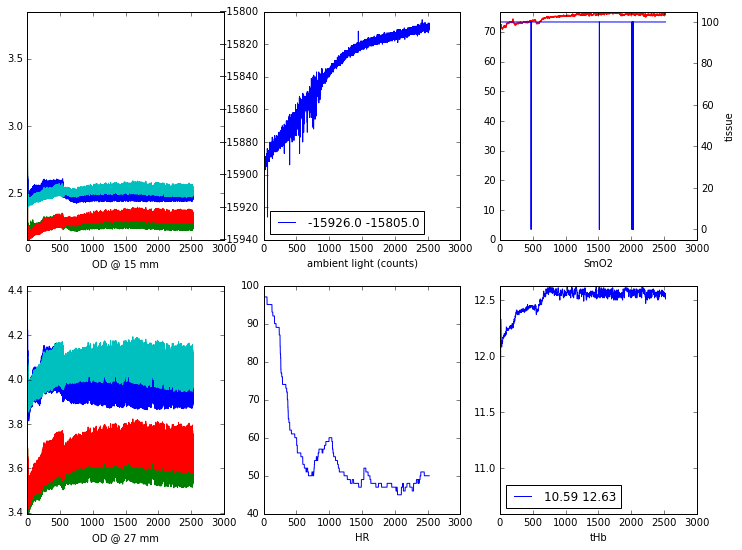

In [113]:
plt.rcParams['figure.figsize'] = 12, 9
assess_id = '56af1a44adac1862458b4569'
if 'HR' in data[assess_id]['process'].keys():
    HR = data[assess_id]['process']['HR']
elif 'HR' in data[assess_id]['sweep'].keys():
    HR = data[assess_id]['sweep']['HR']
    
if 'SmO2' in data[assess_id]['process'].keys():
    SmO2 = data[assess_id]['process']['SmO2']
elif 'SmO2' in data[assess_id]['sweep'].keys():
    SmO2 = data[assess_id]['sweep']['SmO2']
        
if 'tHb' in data[assess_id]['process'].keys():     
    tHb = data[assess_id]['process']['tHb']

    
tissueTF = data[assess_id]['process']['tissueTF']
ambient = data[assess_id]['sweep']['ambient']
OD15 = data[assess_id]['process']['OD15']
OD27 = data[assess_id]['process']['OD27']
    
fig, ax = plt.subplots(2, 3)
    
x2 = np.arange(0, len(OD15)) / 5
ax[0, 0].set_ylim(np.nanmin(OD15), np.nanmax(OD15))
ax[0, 0].plot(x2, OD15)
ax[0, 0].set_xlabel('OD @ 15 mm')
        
x2 = np.arange(0, len(ambient)) / 5
ax[0, 1].plot(x2, ambient,
              label=str(np.nanmin(ambient)) + ' ' + str(np.nanmax(ambient)))
ax[0, 1].set_xlabel('ambient light (counts)')
ax[0, 1].legend()
    
x2 = np.arange(0, len(SmO2)) / 5
ax[0, 2].plot(x2, SmO2, color='red')
ax[0, 2].set_xlabel('SmO2')
ax[0, 2].set_ylim(np.nanmin(SmO2), np.nanmax(SmO2))
ax2 = ax[0, 2].twinx()
ax2.set_ylabel('tissue')
ax2.set_ylim(-5, 105)
ax2.plot(x2, tissueTF *100, color='blue')


x2 = np.arange(0, len(OD27)) / 5
ax[1, 0].set_ylim(np.nanmin(OD27), np.nanmax(OD27))
ax[1, 0].plot(x2, OD27)
ax[1, 0].set_xlabel('OD @ 27 mm')    
    
x2 = np.arange(0, len(HR)) / 5
ax[1, 1].plot(x2, HR)
ax[1, 1].set_xlabel('HR')    
    
x2 = np.arange(0, len(tHb)) / 5
ax[1, 2].set_ylim(np.nanmin(tHb), np.nanmax(tHb))
ax[1, 2].plot(x2, tHb,
              label=str(np.nanmin(tHb)) + ' ' + str(np.nanmax(tHb)))
ax[1, 2].set_xlabel('tHb')
ax[1, 2].legend()
   

plt.show()

In [115]:
x = amod.getMatlabData('56980ad2adac18a7798b4567_process.mat')